<a href="https://colab.research.google.com/github/EdwinAR99/TalentoTECH-Repo/blob/master/NLP_Keras_TalentoTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBS

In [27]:
import keras
from keras.layers import Embedding, Flatten, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
import pandas as pd
import requests
from io import StringIO

import matplotlib.pyplot as plt

# INTRODUCTION

In [2]:
frases = [
    'Hola mundo',
    'Hola a todos',
    'Hola a todo el mundo',
    'Buen dia, como estas hoy'
]

In [3]:
#Generate the tokens dictionary
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word index =', word_index)

word index = {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6, 'buen': 7, 'dia': 8, 'como': 9, 'estas': 10, 'hoy': 11}


In [4]:
#Generation of tokenized secuence
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)

secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2], [7, 8, 9]]


In [5]:
#Fill the secuences to a uniform length
relleno = pad_sequences(secuencias)
print('rellena =\n', relleno)

rellena =
 [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]
 [0 0 7 8 9]]


# IMDB Dataset

In [7]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
# Checking dataset description
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [9]:
# Sentiment count
print("Total:\n", df['sentiment'].value_counts())

Total:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
review = []
sentences = list(df['review'])

for sen in sentences:
  review.append(sen)

In [11]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [12]:
train_sen, test_sen, train_lbl, test_lbl = train_test_split(review, labels, test_size=0.2)

In [22]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

In [14]:
# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# MODEL EMBEDDING

In [ ]:
# Build the model
model = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Setup the training parameters
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                122944    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139009 (543.00 KB)
Trainable params: 139009 (543.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    padded,
    train_lbl,
    epochs = 20,
    batch_size=64,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

Epoch 1/20
625/625 [==============================] - 17s 25ms/step - loss: 0.4925 - accuracy: 0.7423 - val_loss: 0.4296 - val_accuracy: 0.7967
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.3758 - accuracy: 0.8301 - val_loss: 0.4286 - val_accuracy: 0.8011
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3253 - accuracy: 0.8589 - val_loss: 0.4468 - val_accuracy: 0.7942
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2746 - accuracy: 0.8865 - val_loss: 0.4995 - val_accuracy: 0.7865
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2248 - accuracy: 0.9111 - val_loss: 0.5668 - val_accuracy: 0.7771
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1773 - accuracy: 0.9334 - val_loss: 0.6442 - val_accuracy: 0.7744
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1324 - accuracy: 0.9535 - val_loss: 0.7655 - val_accuracy: 0.7665
Epoc

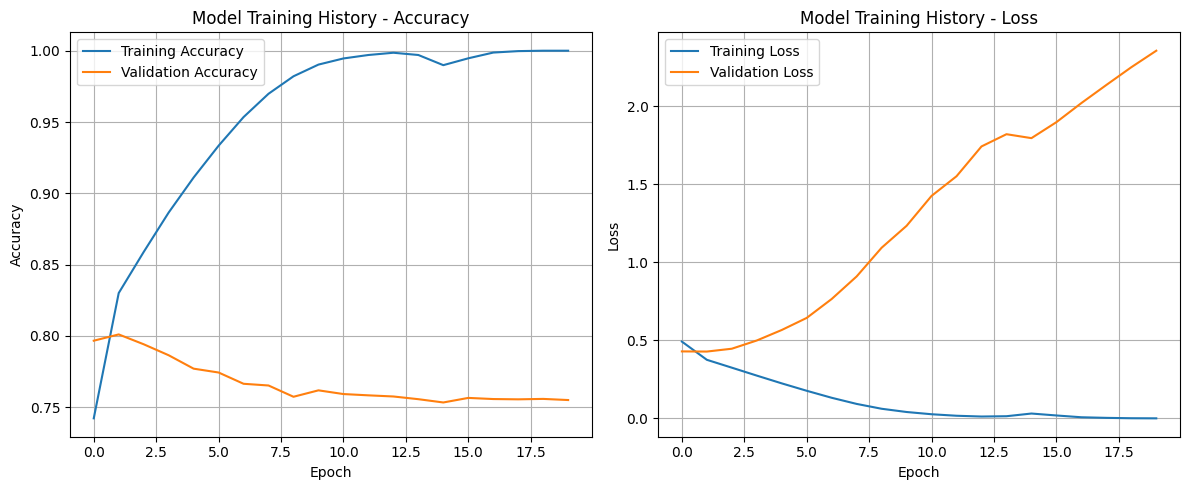

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# QUESTIONS AND EXERCICES

1. ¿Qué hace el código en general?

  Resp: El código entrena un modelo de aprendizaje automático utilizando datos de entrenamiento y luego grafica el historial de entrenamiento del modelo, mostrando la precisión y las pérdidas a lo largo de las épocas.

2. ¿Cuál es el propósito de cada parte del código?

  Resp: El código se divide en varias partes: importación de bibliotecas, entrenamiento del modelo, y graficación del historial de entrenamiento. Cada parte tiene un propósito específico: importar las bibliotecas necesarias, entrenar el modelo con los datos de entrenamiento y graficar la precisión y las pérdidas a lo largo del tiempo.

3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo,
num_words, embedding_dim, input_length, loss, optimizer, etc.)?

  Resp: Se utilizan parámetros especiales como 'epochs' y 'validation_data' en la función 'model.fit()' para controlar la cantidad de veces que el modelo verá los datos de entrenamiento ('epochs') y para especificar los datos de validación que se utilizarán para evaluar el modelo durante el entrenamiento ('validation_data').

4. ¿Cuál es la diferencia entre train_sentences y test_sentences?

  Resp: 'train_sentences' y 'test_sentences' son conjuntos de oraciones utilizados para entrenar y probar el modelo, respectivamente. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento final.

5. ¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?

  Resp: 'vocab_size', 'max_length', 'embedding_dim' y 'oov_tok' son parámetros relacionados con el preprocesamiento de texto. 'vocab_size' especifica el tamaño del vocabulario, 'max_length' especifica la longitud máxima de las secuencias de texto, 'embedding_dim' especifica la dimensión del espacio de incrustación y 'oov_tok' es el token que se utiliza para palabras fuera del vocabulario.

6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?

  Resp: Las capas 'Embedding', 'Flatten', 'Dense' y 'sigmoid' en el modelo se utilizan para procesar y clasificar datos de texto. La capa 'Embedding' convierte las palabras en vectores de incrustación, la capa 'Flatten' aplana los datos para que puedan ser procesados por una capa densa, la capa 'Dense' es una capa completamente conectada que aplica una transformación lineal a los datos y la capa 'sigmoid' aplica una función de activación sigmoide para obtener la salida final.

7. ¿Qué representan las métricas de pérdida y precisión en el modelo?

  Resp: Las métricas de pérdida y precisión en el modelo representan cómo de bien el modelo está haciendo predicciones en comparación con las etiquetas verdaderas. La pérdida mide cuánto difieren las predicciones del modelo de las etiquetas verdaderas, mientras que la precisión mide la proporción de predicciones correctas realizadas por el modelo.

8. ¿Qué pasa durante el entrenamiento del modelo?

  Resp: Durante el entrenamiento del modelo, se ajustan los parámetros del modelo para minimizar la pérdida en los datos de entrenamiento. Esto se hace iterativamente a lo largo de múltiples épocas.

9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?

  Resp: Las épocas son el número de veces que el modelo verá todos los datos de entrenamiento durante el proceso de entrenamiento. Afectan al proceso de entrenamiento al controlar cuántas veces se ajustan los parámetros del modelo en función de los datos de entrenamiento.

10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?

  Resp: Es importante validar el modelo utilizando datos de prueba para evaluar su rendimiento en datos no vistos. Esto ayuda a detectar si el modelo está sobreajustando los datos de entrenamiento y proporciona una estimación del rendimiento del modelo en situaciones del mundo real.

11. ¿Cuál es el objetivo final del código?

  Resp: El objetivo final del código es entrenar un modelo de aprendizaje automático para clasificar datos de texto y evaluar su rendimiento utilizando métricas de pérdida y precisión. La graficación del historial de entrenamiento ayuda a visualizar cómo el modelo mejora a lo largo del tiempo y si hay signos de sobreajuste.

Modifica los parámetros del modelo (como el tamaño del vocabulario, la longitud máxima, la dimensión de incrustación, etc.) y observa cómo afecta al rendimiento del modelo.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 32)           64000     
                                                                 
 flatten_7 (Flatten)         (None, 4800)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                307264    
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 371329 (1.42 MB)
Trainable params: 371329 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.4423 - accuracy: 0.7831 - val_loss: 0.3681 - val_accuracy: 0.8331
Epoch 2

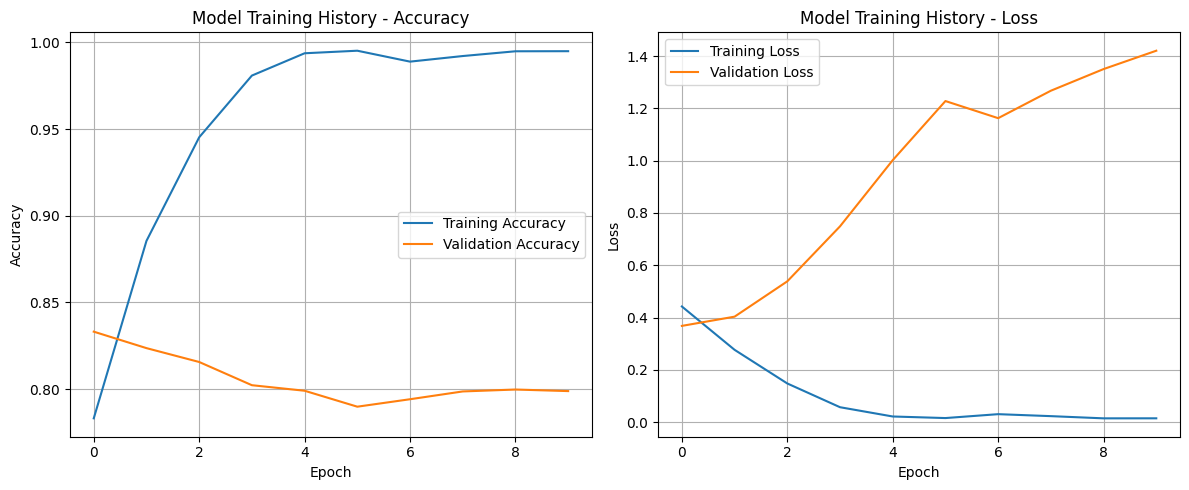

In [24]:
# Nuevos parámetros
vocab_size = 2000
max_length = 150
embedding_dim = 32
trunc_type = 'post'
oov_tok = "<OOV>"

# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Build the model
modelN = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Setup the training parameters
modelN.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
modelN.summary()

# Train the model
history = modelN.fit(
    padded,
    train_lbl,
    epochs = 10,
    batch_size=64,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Experimenta con diferentes arquitecturas de modelos (agregando o eliminando capas, cambiando las funciones de activación, etc.) y observa cómo afecta al rendimiento.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 32)           64000     
                                                                 
 conv1d (Conv1D)             (None, 146, 128)          20608     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                      

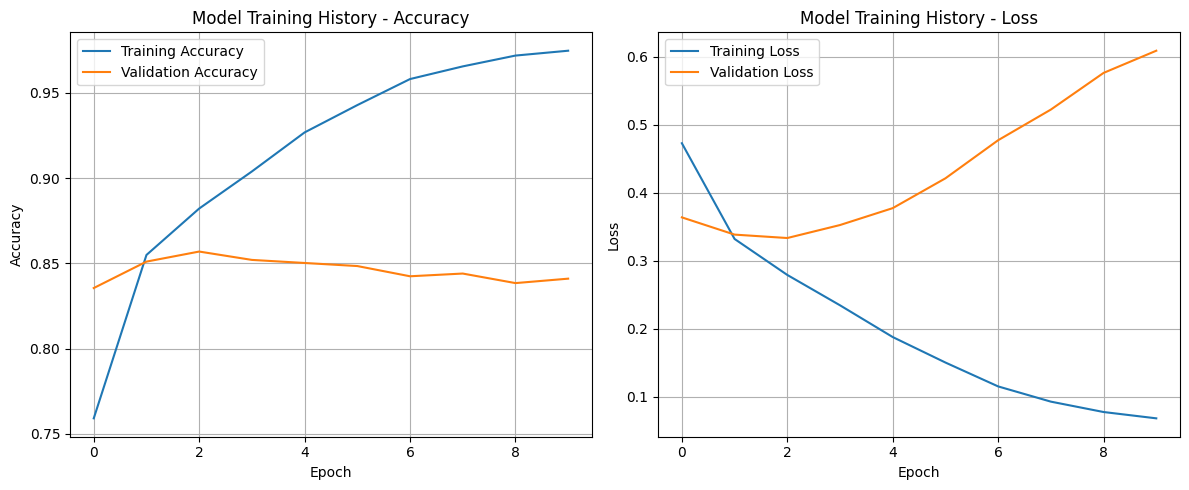

In [25]:
# Definir una nueva arquitectura de modelo
modelN2 = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el nuevo modelo
modelN2.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
modelN2.summary()

# Train the model
history = modelN2.fit(
    padded,
    train_lbl,
    epochs = 10,
    batch_size=64,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

 Intenta utilizar un algoritmo de optimización diferente y observa cómo afecta al rendimiento del modelo.

Epoch 1/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4625 - accuracy: 0.7674 - val_loss: 0.3634 - val_accuracy: 0.8374
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3146 - accuracy: 0.8653 - val_loss: 0.3626 - val_accuracy: 0.8399
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2256 - accuracy: 0.9116 - val_loss: 0.4314 - val_accuracy: 0.8229
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.1303 - accuracy: 0.9530 - val_loss: 0.5359 - val_accuracy: 0.8113
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.8060 - val_accuracy: 0.7864
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.9592 - val_accuracy: 0.7983
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 1.2182 - val_accuracy: 0.7942

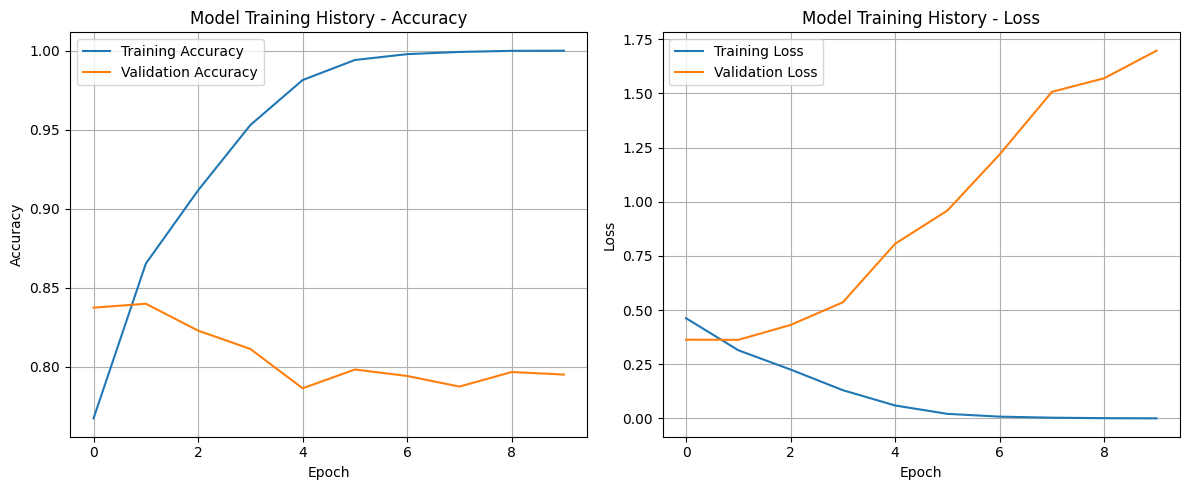

In [29]:
# Build the model with RMSprop optimizer
model_with_rmsprop = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
model_with_rmsprop.compile(optimizer='rmsprop',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Train the model with RMSprop optimizer
history_with_rmsprop = model_with_rmsprop.fit(padded, train_lbl,
                                              epochs=10,
                                              batch_size=64,
                                              verbose=1,
                                              validation_data=(test_padded, test_lbl))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history_with_rmsprop.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_with_rmsprop.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history_with_rmsprop.history['loss'], label='Training Loss')
axes[1].plot(history_with_rmsprop.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

 Divide los datos en diferentes proporciones para entrenamiento y prueba y observa cómo afecta al rendimiento del modelo.


Epoch 1/10
625/625 [==============================] - 9s 12ms/step - loss: 0.4433 - accuracy: 0.7787 - val_loss: 0.3638 - val_accuracy: 0.8367
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2850 - accuracy: 0.8817 - val_loss: 0.3821 - val_accuracy: 0.8304
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.1572 - accuracy: 0.9421 - val_loss: 0.5221 - val_accuracy: 0.8017
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.7142 - val_accuracy: 0.8019
Epoch 5/10
625/625 [==============================] - 7s 12ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.9553 - val_accuracy: 0.7993
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 1.1199 - val_accuracy: 0.7941
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 1.1687 - val_accuracy: 0.7

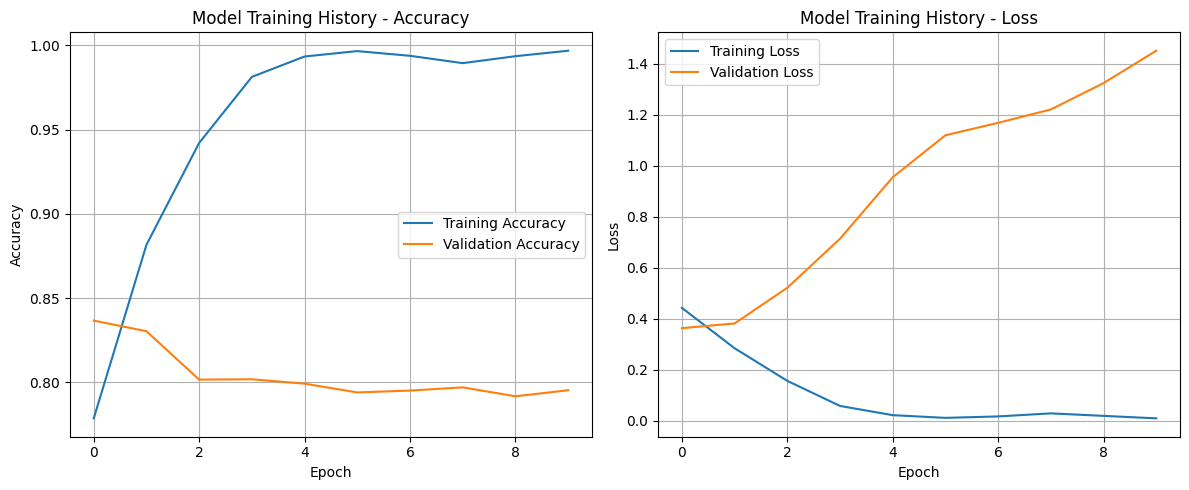

In [30]:
# List test_size
ls_test_size = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

# Dividir los datos en diferentes proporciones para entrenamiento y prueba
train_sen, test_sen, train_lbl, test_lbl = train_test_split(sentences, labels, test_size=0.5, random_state=42)

# Initialize the tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Build the model
model = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(padded, train_lbl,
                    epochs=10,
                    batch_size=64,
                    verbose=1,
                    validation_data=(test_padded, test_lbl))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Explora otras métricas de evaluación del modelo y compara su rendimiento con las métricas existentes.


In [31]:
# Predicciones del modelo en los datos de prueba
predictions = model.predict(test_padded)
predictions_binary = (predictions > 0.5).astype(int)

# Calcular métricas
accuracy = accuracy_score(test_lbl, predictions_binary)
precision = precision_score(test_lbl, predictions_binary)
recall = recall_score(test_lbl, predictions_binary)
f1 = f1_score(test_lbl, predictions_binary)
roc_auc = roc_auc_score(test_lbl, predictions)

# Imprimir métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.7954
Precision: 0.8083659592004946
Recall: 0.7785274856122246
F1 Score: 0.7931661949049738
ROC AUC Score: 0.8783478786849391


# MODEL RNN (LSTM)

In [ ]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

In [ ]:
# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
# Build the model
modelLSTM = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Setup the training parameters
modelLSTM.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                122944    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139009 (543.00 KB)
Trainable params: 139009 (543.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
historyLSTM = modelLSTM.fit(
    padded,
    train_lbl,
    epochs = 10,
    batch_size=64,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

Epoch 1/10
625/625 [==============================] - 25s 31ms/step - loss: 0.5002 - accuracy: 0.7444 - val_loss: 0.4541 - val_accuracy: 0.8074
Epoch 2/10
625/625 [==============================] - 12s 20ms/step - loss: 0.4110 - accuracy: 0.8138 - val_loss: 0.4229 - val_accuracy: 0.7975
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.4020 - accuracy: 0.8170 - val_loss: 0.4075 - val_accuracy: 0.8130
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.3919 - accuracy: 0.8220 - val_loss: 0.4339 - val_accuracy: 0.7980
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 0.3824 - accuracy: 0.8256 - val_loss: 0.4133 - val_accuracy: 0.8124
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3742 - accuracy: 0.8299 - val_loss: 0.3912 - val_accuracy: 0.8211
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3596 - accuracy: 0.8368 - val_loss: 0.3934 - val_accuracy:

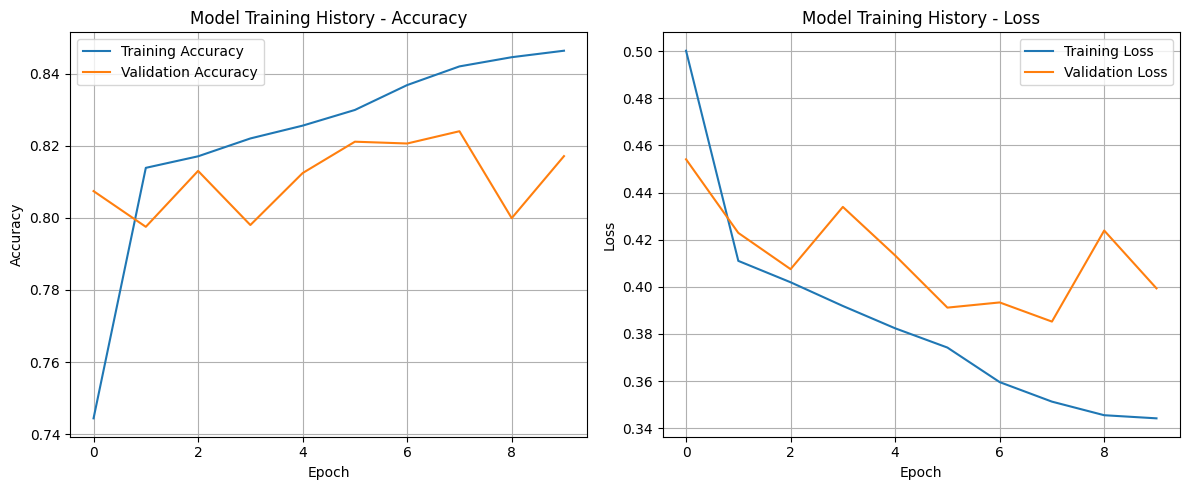

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(historyLSTM.history['accuracy'], label='Training Accuracy')
axes[0].plot(historyLSTM.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(historyLSTM.history['loss'], label='Training Loss')
axes[1].plot(historyLSTM.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# QUESTION AND EXERCISES LSTM

1. ¿Qué tipo de modelo de red neuronal se construye en el código?

  Resp: El código construye un modelo de red neuronal recurrente (RNN) utilizando capas LSTM (Long Short-Term Memory).

2. ¿Cuál es la función de activación utilizada en la capa de salida y por qué se elige esta función para este problema?

  Resp: En problemas de clasificación binaria, es común usar la función de activación sigmoide en la capa de salida. Esto es porque la función sigmoide comprime los valores a un rango entre 0 y 1, lo que es ideal para interpretar la salida como una probabilidad de pertenencia a una clase.

3. ¿Cuál es la diferencia entre una capa LSTM bidireccional y una capa LSTM unidireccional?

  Resp: En una capa LSTM unidireccional, la secuencia de entrada se procesa en una sola dirección, mientras que en una capa LSTM bidireccional, la secuencia de entrada se procesa en ambas direcciones: de pasado a futuro y de futuro a pasado.

4. ¿Qué significan los parámetros return_sequences=True en la primera capa LSTM bidireccional?

  Resp: El parámetro 'return_sequences=True' indica que la capa LSTM debe devolver secuencias en lugar de un solo estado oculto. Esto es importante cuando se apilan capas LSTM, ya que la salida de una capa LSTM debe ser una secuencia para ser la entrada de la siguiente capa LSTM.

5. ¿Qué función de pérdida se utiliza en el modelo y por qué es adecuada para problemas de clasificacion binaria?

  Resp: Para problemas de clasificación binaria, se suele utilizar la función de pérdida de entropía cruzada binaria (binary cross-entropy). Esta función de pérdida es adecuada porque mide la discrepancia entre la distribución de probabilidad predicha por el modelo y la distribución de probabilidad real de los datos de manera efectiva para problemas de clasificación binaria.

6. ¿Qué métrica se utiliza para evaluar el rendimiento del modelo durante el entrenamiento?

  Resp: Para evaluar el rendimiento del modelo durante el entrenamiento en problemas de clasificación binaria, se suele utilizar la precisión (accuracy), que es la proporción de predicciones correctas sobre el total de predicciones.

7. ¿Por qué se utilizan dos capas LSTM bidireccionales en el modelo?

  Resp: El uso de múltiples capas LSTM bidireccionales permite al modelo capturar de manera más efectiva las dependencias a largo plazo en ambos sentidos de la secuencia de entrada, lo que puede mejorar el rendimiento del modelo en problemas complejos.

8. ¿Qué hace la capa de embedding en el modelo y por qué es necesaria?

  Resp: La capa de embedding convierte los índices de palabras en vectores de números reales densos. Esto es necesario porque las redes neuronales no pueden manejar directamente texto en forma de palabras, por lo que necesitan representaciones vectoriales. Los embeddings permiten al modelo aprender representaciones de palabras significativas para el problema específico en cuestión.

Modifica el número de unidades de memoria en las capas LSTM y observa cómo afecta el rendimiento del modelo

In [ ]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

# Initialize the tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# Define a function to create the model
def create_model(units_lstm1, units_lstm2):
    model = keras.Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        LSTM(units_lstm1, return_sequences=True),
        LSTM(units_lstm2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define different numbers of units for LSTM layers
units_lstm1_values = [32, 64, 128]
units_lstm2_values = [16, 32, 64]

# History list to save
histories = []


# Train models with different numbers of units and evaluate performance
for units_lstm1 in units_lstm1_values:
    for units_lstm2 in units_lstm2_values:
        print(f"Training model with {units_lstm1} units in first LSTM layer and {units_lstm2} units in second LSTM layer...")
        model = create_model(units_lstm1, units_lstm2)
        model.compile(
            loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )
        history = model.fit(
            padded,
            train_lbl,
            epochs=10,
            batch_size=64,
            verbose=1,
            validation_data=(test_padded, test_lbl)
        )
        histories.append(history)

Training model with 32 units in first LSTM layer and 16 units in second LSTM layer...
Epoch 1/10
625/625 [==============================] - 75s 110ms/step - loss: 0.4939 - accuracy: 0.7483 - val_loss: 0.4701 - val_accuracy: 0.7759
Epoch 2/10
625/625 [==============================] - 62s 100ms/step - loss: 0.4132 - accuracy: 0.8132 - val_loss: 0.4099 - val_accuracy: 0.8171
Epoch 3/10
625/625 [==============================] - 58s 94ms/step - loss: 0.4012 - accuracy: 0.8178 - val_loss: 0.4056 - val_accuracy: 0.8142
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3911 - accuracy: 0.8212 - val_loss: 0.3963 - val_accuracy: 0.8168
Epoch 5/10
625/625 [==============================] - 65s 105ms/step - loss: 0.3823 - accuracy: 0.8227 - val_loss: 0.4048 - val_accuracy: 0.8164
Epoch 6/10
625/625 [==============================] - 95s 153ms/step - loss: 0.3708 - accuracy: 0.8298 - val_loss: 0.3978 - val_accuracy: 0.8181
Epoch 7/10
625/625 [=========================

In [ ]:
# Create subplots
fig, axes = plt.subplots(len(histories), 2, figsize=(12, 5))

i = 0

for his in histories:
  # Graphic the training history - Accuracy
  axes[i][0].plot(his.history['accuracy'], label='Training Accuracy')
  axes[i][0].plot(his.history['val_accuracy'], label='Validation Accuracy')
  axes[i][0].set_title('Model Training History - Accuracy')
  axes[i][0].set_xlabel('Epoch')
  axes[i][0].set_ylabel('Accuracy')
  axes[i][0].legend()
  axes[i][0].grid(True)

  # Graphic the training history - Loss
  axes[i][1].plot(his.history['loss'], label='Training Loss')
  axes[i][1].plot(his.history['val_loss'], label='Validation Loss')
  axes[i][1].set_title('Model Training History - Loss')
  axes[i][1].set_xlabel('Epoch')
  axes[i][1].set_ylabel('Loss')
  axes[i][1].legend()
  axes[i][1].grid(True)

  i += 1

plt.tight_layout()
plt.show()

Cambia la función de activación de la capa densa a 'tanh' y compara los resultados.


Entrena el modelo durante más épocas y observa si mejora el rendimiento en el conjunto de validación.

 Experimenta con diferentes valores para los parámetros max_length y vocab_size y observa cómo afectan el tamaño y la eficiencia del modelo.

 Agrega una capa de regularización, como Dropout, al modelo y observa si mejora la generalización del modelo.

Cambia la arquitectura del modelo agregando más capas ocultas y observa cómo afecta la capacidad de aprendizaje del modelo.
